# Perfect Foresight Model Impatience Conditions

In [1]:
# Initial notebook set up

%matplotlib inline
import matplotlib.pyplot as plt

# The first step is to be able to bring things in from different directories
import sys 
import os

sys.path.insert(0, os.path.abspath('../lib'))

import numpy as np
import HARK 
from time import clock
from copy import deepcopy
mystr = lambda number : "{:.4f}".format(number)
from HARK.utilities import plotFuncs

# These last two will make our charts look nice
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Dark2')

After using the Jupyter notebook [Gentle-Intro-To-HARK-PerfForesightCRRA](https://github.com/econ-ark/DemARK/blob/Course-Choice/notebooks/Gentle-Intro-To-HARK-PerfForesightCRRA.ipynb) to learn the basics of HARK operations, and the code contained in this notebook, answer the following questions:



[PerfectForesightCRRA](http://www.econ2.jhu.edu/people/ccarroll/public/lecturenotes/Consumption/PerfForesightCRRA) defines several 'impatience' conditions that are useful in understanding the model.

If the 'absolute impatience condition' holds, 
\begin{eqnarray}
  (R \beta)^{1/\rho} & < & 1,
\end{eqnarray}
consumption will be falling over time.

The handout claims that in order for the perfect foresight consumption model to be useful, it is necessary to impose
the 'return impatience condition':

\begin{eqnarray}
  \frac{(R \beta)^{1/\rho}}{R} & < & 1
\end{eqnarray}

and the 'growth impatience condition':

\begin{eqnarray}
  \frac{(R \beta)^{1/\rho}}{G} & < & 1
\end{eqnarray}

This question asks you to explore numerically what happens to the consumption function as these two conditions get very close to failing.

Specifically, given the default set of parameter values used in the notebook below, you should:

1. Plot the consumption function for a perfect foresight consumer with those parameter values, along with the "sustainable" level of consumption that would preserve wealth
1. Calculate the numerical values of the three impatience conditions
0. Calculate the values of $\beta$ and $G$ such that the impatience factors on the LHS of the two equations would be exactly equal to 1

Next, you should plot a sequence of consumption functions of a HARK `PerfForesightConsumerType` consumer:

1. For some sequence of values of $\beta$ that go from the default value to some value very close to the point where the 'return impatience condition' fails
0. For some sequence of values of $G$ that go from the default value to some value very close to the point where the 'growth impatience condition' fails

and in each case you should explain, using analytical mathematical reasoning, the numerical result you get.

In [2]:
# Import the machinery for solving the perfect foresight model and the default parameters

from HARK.ConsumptionSaving.ConsIndShockModel import PerfForesightConsumerType # Import the consumer type
import HARK.ConsumptionSaving.ConsumerParameters as Params # Import default parameters

# Now extract the default values of the parameters of interest

CRRA       = Params.CRRA 
Rfree      = Params.Rfree 
DiscFac    = Params.DiscFac
PermGroFac = Params.PermGroFac

In [10]:
# Now create a perfect foresight consumer example
PFagent = PerfForesightConsumerType(**Params.init_perfect_foresight)
PFagent.cycles = 0 # We need the consumer to be infinitely lived I think
PFagent.LivPrb = [1.0]

# Solve the agent's problem
PFagent.solve()

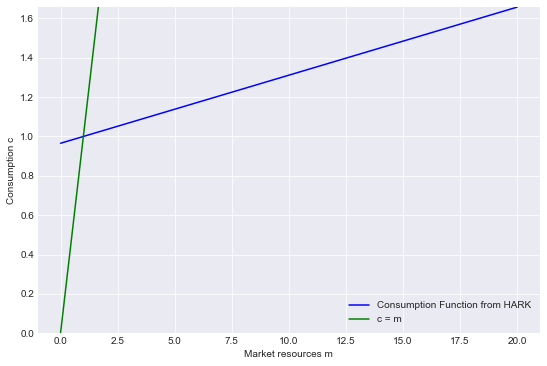

In [25]:
# Plot the consumption function 

# Remember, after doing .solve(), the consumption function is stored as PFagent.solution[0].cFunc

# Set out some range of market resources that we want to plot consumption for

mMin = 0
mMax = 20
numPoints = 100
m_range  = np.linspace(mMin, mMax, numPoints) # This creates an array of points in the given range

# Feed our range of market resources into our consumption function in order to get consumption at each point

cHARK = PFagent.solution[0].cFunc(m_range) # Because the input m_range is an array, the output cHARK is too

# Construct the 45 degree line where value on vertical axis matches horizontal
degree45 = m_range # This will be the array of y points identical to the x points

# Find the value of consumption at the largest value of m
c_max    = PFagent.solution[0].cFunc([mMax])

# Use matplotlib package (imported in first cell) to plot the consumption function
plt.figure(figsize=(9,6)) # set the figure size
plt.ylim(0.,c_max[0])     # set the range for the vertical axis 
plt.plot(m_range, cHARK, 'b', label='Consumption Function from HARK') # Plot m's on the x axis, versus our c on the y axis, and make the line blue, with a label
plt.xlabel('Market resources m') # x axis label
plt.ylabel('Consumption c')      # y axis label

# The plot is named plt and it hangs around like a variable 
# but is not displayed until you do a plt.show()


plt.plot(m_range, degree45  , 'g', label='c = m') # Add 45 degree line
plt.legend() # construct the legend

plt.show() # show the plot

In [ ]:
# QUESTION: Now calculate and plot the "sustainable" level of consumption that leaves wealth untouched
# and plot it against the perfect foresight solution

cSustainable = 0. + 0.*(m_range-1) # For any given level of m, the level of c that would leave wealth unchanged
# Obviously, 0 is the wrong formula here -- you should fill in the right one

plt.figure(figsize=(9,6)) # set the figure size
plt.xlabel('Market resources m') # x axis label
plt.ylabel('Consumption c') # y axis label

plt.plot(m_range, cSustainable  , 'k', label='Sustainable c') # Add sustainable c line
plt.plot(m_range, cHARK, 'b', label='c Function')
plt.legend()

plt.show() # show the plot

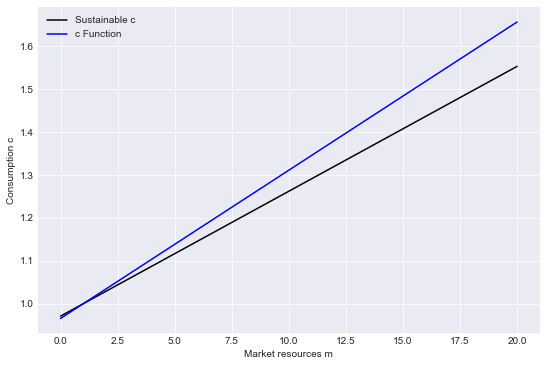

In [26]:
# Now calculate and plot the "sustainable" level of consumption that leaves wealth untouched
# and plot it against the perfect foresight solution
# SOLUTIONS

cSustainable = 1+ ((Rfree-1)/Rfree)*(m_range-1) # For any given level of m, the level of c that would leave wealth unchanged

plt.figure(figsize=(9,6)) # set the figure size
plt.xlabel('Market resources m') # x axis label
plt.ylabel('Consumption c') # y axis label

plt.plot(m_range, cSustainable  , 'k', label='Sustainable c') # Add sustainable c line
plt.plot(m_range, cHARK, 'b', label='c Function')
plt.legend()
plt.show() # show the plot

In [ ]:
# Compute the values of the impatience conditions

Pat_df  = 0. # Plug in the formula for the absolute patience factor
PatR_df = 0. # Plug in the formula for the return patience factor
PatG_df = 0. # Plug in the formula for the growth patience factor

DiscFac_lim = 0. # The limiting value such that the RIC exactly fails
PermGroFac_lim = 0. # The limiting value such that the GIC exactly fails

In [27]:
# Compute the values of the impatience conditions -- SOLUTIONS

Pat_df  = (Rfree*DiscFac)**(1/CRRA) # Plug in the formula for the absolute patience factor
PatR_df = Pat_df/Rfree # Plug in the formula for the return patience factor
PatG_df = Pat_df/float(PermGroFac[0]) # Plug in the formula for the growth patience factor.
                                      # Note how we have to convert a list to a float here

DiscFac_lim = Rfree**(CRRA-1) # The limiting value such that the RIC exactly fails
PermGroFac_lim = (Rfree*DiscFac)**(1/CRRA) # The limiting value such that the GIC exactly fails

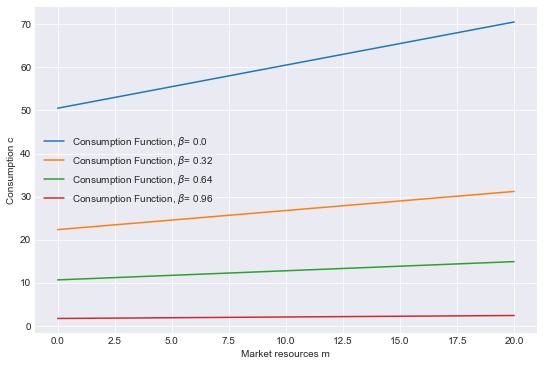

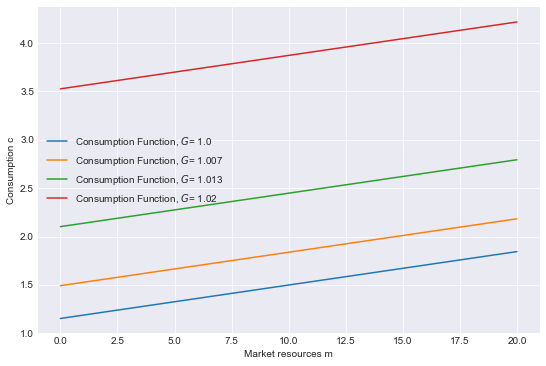

In [28]:
# Construct an array of values for beta (DiscFac) and G (PermGro)

# The code below is an example to show you how to plot a set of consumption functions
# for a sequence of values of the discount factor.  You should be able to figure out 
# how to adapt this code to solve the problem posed
DiscFac_min = 0.
DiscFac_max = DiscFac
numPoints = 4
DiscFac_list = np.linspace(DiscFac_min, DiscFac_max, numPoints) # Create a list of beta values

plt.figure(figsize=((9,6))) # set the plot size
for i in range(len(DiscFac_list)):
    PFagent.DiscFac = DiscFac_list[i]
    PFagent.solve()
    cHARK = PFagent.solution[0].cFunc(m_range)
    plt.plot(m_range, cHARK, label='Consumption Function, $\\beta$= '+str(PFagent.DiscFac))

PFagent.DiscFac = 0.96 # return discount factor to default value
plt.xlabel('Market resources m') # x axis label
plt.ylabel('Consumption c')      # y axis label
plt.legend()                     # show legend
plt.show()                       # plot chart


# Now plot the consumption functions for values of G above the default value
# Note the tricky fact that PermGro is a list of values because it could 
# be representing some arbitrary sequence of growth rates

PermGro_min = 1.0
PermGro_max = 1.02 # Arbitrary number larger than the default value
PermGroArray = np.linspace(PermGro_min, PermGro_max, numPoints, endpoint=True)
PermGroList = PermGroArray.tolist() # Make growth factors a list

plt.figure(figsize=((9,6))) # set the plot size
for i in range(len(PermGroList)):
    PFagent.PermGroFac[0] = PermGroList[i]
    PFagent.solve()
    cHARK = PFagent.solution[0].cFunc(m_range)
    plt.plot(m_range, cHARK, label='Consumption Function, $G$= '+str(round(PFagent.PermGroFac[0],3)))

PFagent.PermGroFac = [1.01]      # return discount factor to default value
plt.xlabel('Market resources m') # x axis label
plt.ylabel('Consumption c')      # y axis label
plt.legend()                     # show legend
plt.show()                       # plot chart

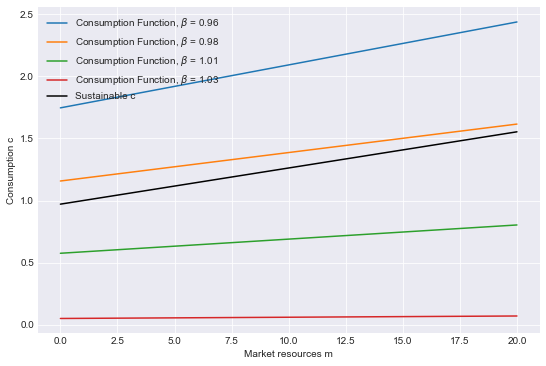

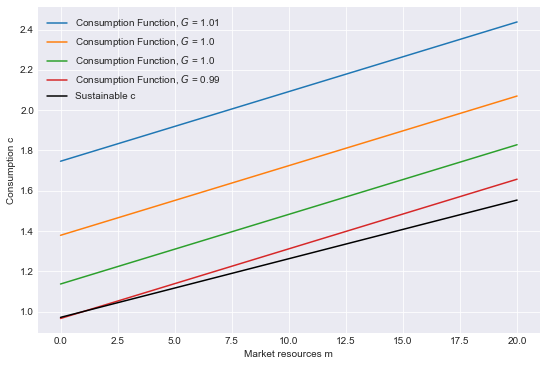

In [29]:
# SOLUTIONS
DiscFac_min = 0.96
DiscFac_max = DiscFac_lim
numPoints = 4
DiscFac_list = np.linspace(DiscFac_min, DiscFac_max, numPoints, endpoint=True) # Create a list of beta values

plt.figure(figsize=((9,6))) # set the plot size
for i in range(len(DiscFac_list)):
    PFagent.DiscFac = DiscFac_list[i]
    PFagent.solve()
    cHARK = PFagent.solution[0].cFunc(m_range)
    plt.plot(m_range, cHARK, label='Consumption Function, $\\beta$ = '+str(round(PFagent.DiscFac,2)))
    #print(((PFagent.Rfree*PFagent.DiscFac)**(1/PFagent.CRRA))/PFagent.Rfree)

PFagent.DiscFac = 0.96 # return discount factor to default value
cSustainable = 1 + ((Rfree-1)/Rfree)*(m_range-1) # For any given level of m, the level of c that would leave wealth unchanged
plt.plot(m_range, cSustainable, 'k', label='Sustainable c') # Add sustainable c line
plt.xlabel('Market resources m') # x axis label
plt.ylabel('Consumption c')      # y axis label
plt.legend()                     # show legend
plt.show()                       # plot chart


# Now plot the consumption functions for values of G
PermGro_min = 1.01
PermGro_max = PermGroFac_lim
PermGroArray = np.linspace(PermGro_min, PermGro_max, numPoints, endpoint=True)
PermGroList = PermGroArray.tolist() # Make growth factors a list

plt.figure(figsize=((9,6))) # set the plot size
for i in range(len(PermGroList)):
    PFagent.PermGroFac[0] = PermGroList[i]
    PFagent.solve()
    cHARK = PFagent.solution[0].cFunc(m_range)
    plt.plot(m_range, cHARK, label='Consumption Function, $G$ = '+str(round(PFagent.PermGroFac[0],2)))
    #print(((PFagent.Rfree*PFagent.DiscFac)**(1/PFagent.CRRA))/PFagent.PermGroFac[0])

PFagent.PermGroFac = [1.01]      # return discount factor to default value
plt.plot(m_range, cSustainable  , 'k', label='Sustainable c') # Add sustainable c line
plt.xlabel('Market resources m') # x axis label
plt.ylabel('Consumption c')      # y axis label
plt.legend()                     # show legend
plt.show()

SOLUTIONS

The red lines indicate the consumption functions where the patience conditions are close to being violated.

In the first case, where we violate the return patience condition, we see that the consumption function is extremely flat. This is because the consumer's preffered consumption growth is lower than the return on his assets. As a result, the consumer accumulates assets, delaying consumption until tomorrow, and his assets become infinite as the number of time periods tends to infinity.

In the second case, where we violate the growth patience condition, we see that the consumer with no assets just falls below the sustainable consumption line.